In [1]:
import os
# os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION']='.9'
import jax
import jax.numpy as jnp
from jax import random,  vmap, jit
from jax import config
# from jax.ops import index_update, index
from jax import lax
from jax.flatten_util import ravel_pytree

import itertools
from functools import partial
from tqdm.auto import trange, tqdm
import time

from scipy.interpolate import griddata
from scipy.sparse import csr_matrix

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
# plt.rcParams.update({'font.size': 5})

config.update("jax_enable_x64", True)

In [2]:
initial_mean=jnp.array([[0,0,0]])





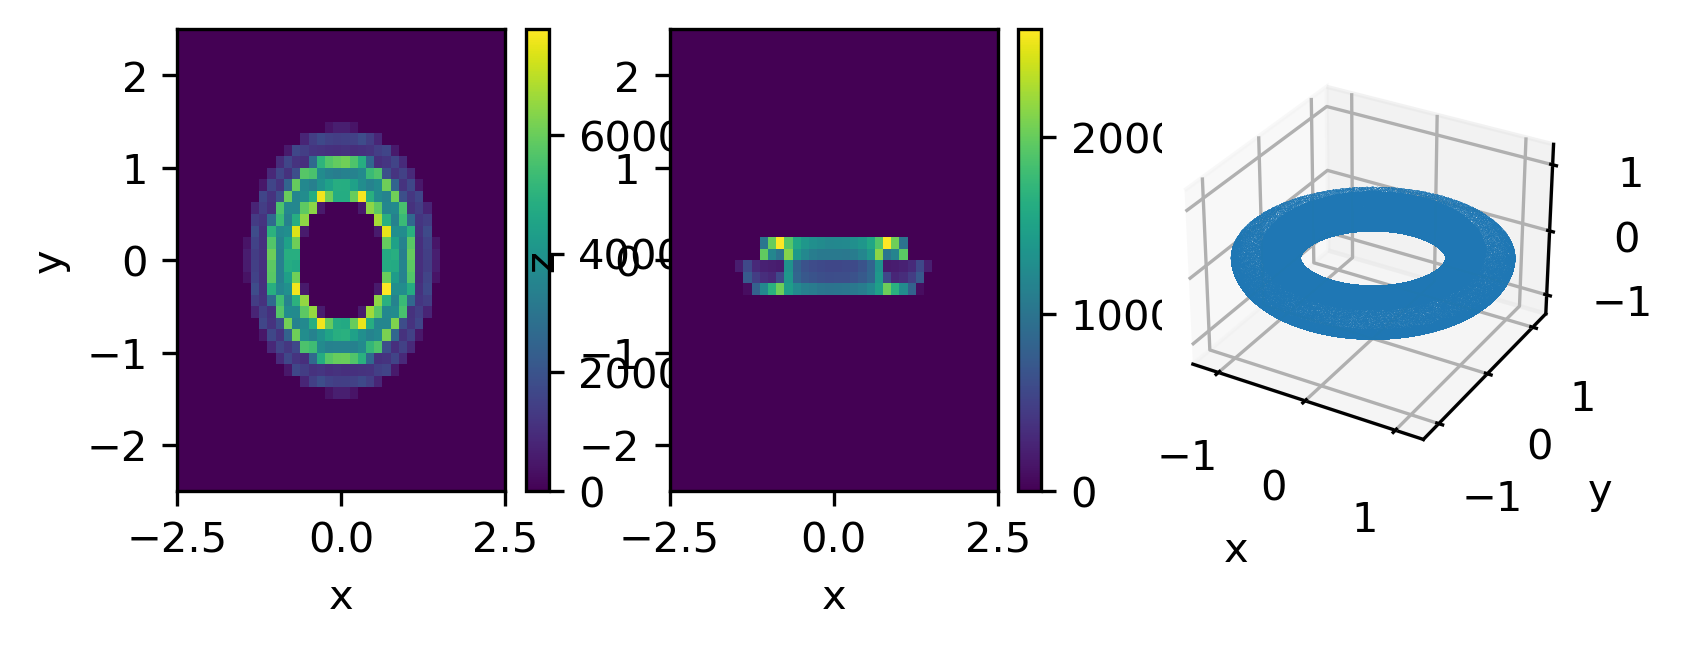

In [3]:
from A4M42 import PKS
from aur import gen_initX

rngseed1=240
rng_key1=random.PRNGKey(rngseed1)
rngseed2=245
rng_key2=random.PRNGKey(rngseed1)
ModelM0=180
pos=jnp.array([[0,0,0]])
iniX=gen_initX(rng_key1,J=2**20,r1=1,r2=0.4,pos=pos,plot=True)
T=6e-2
dt=0.5e-4
eps=1e-4

In [4]:
def Vfunc(X):
    Vx=jnp.zeros((3))
    return Vx
model=PKS(L=8,rng_key=rng_key2,eps=eps,H=256)
model.Vfunc=Vfunc
model.M0=ModelM0
model.X=iniX
model.solve(t=T,t0=dt,show_num=100)



--- Build time 0.20336294174194336 s ---


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

--- Total time 4544.203829050064 s ---


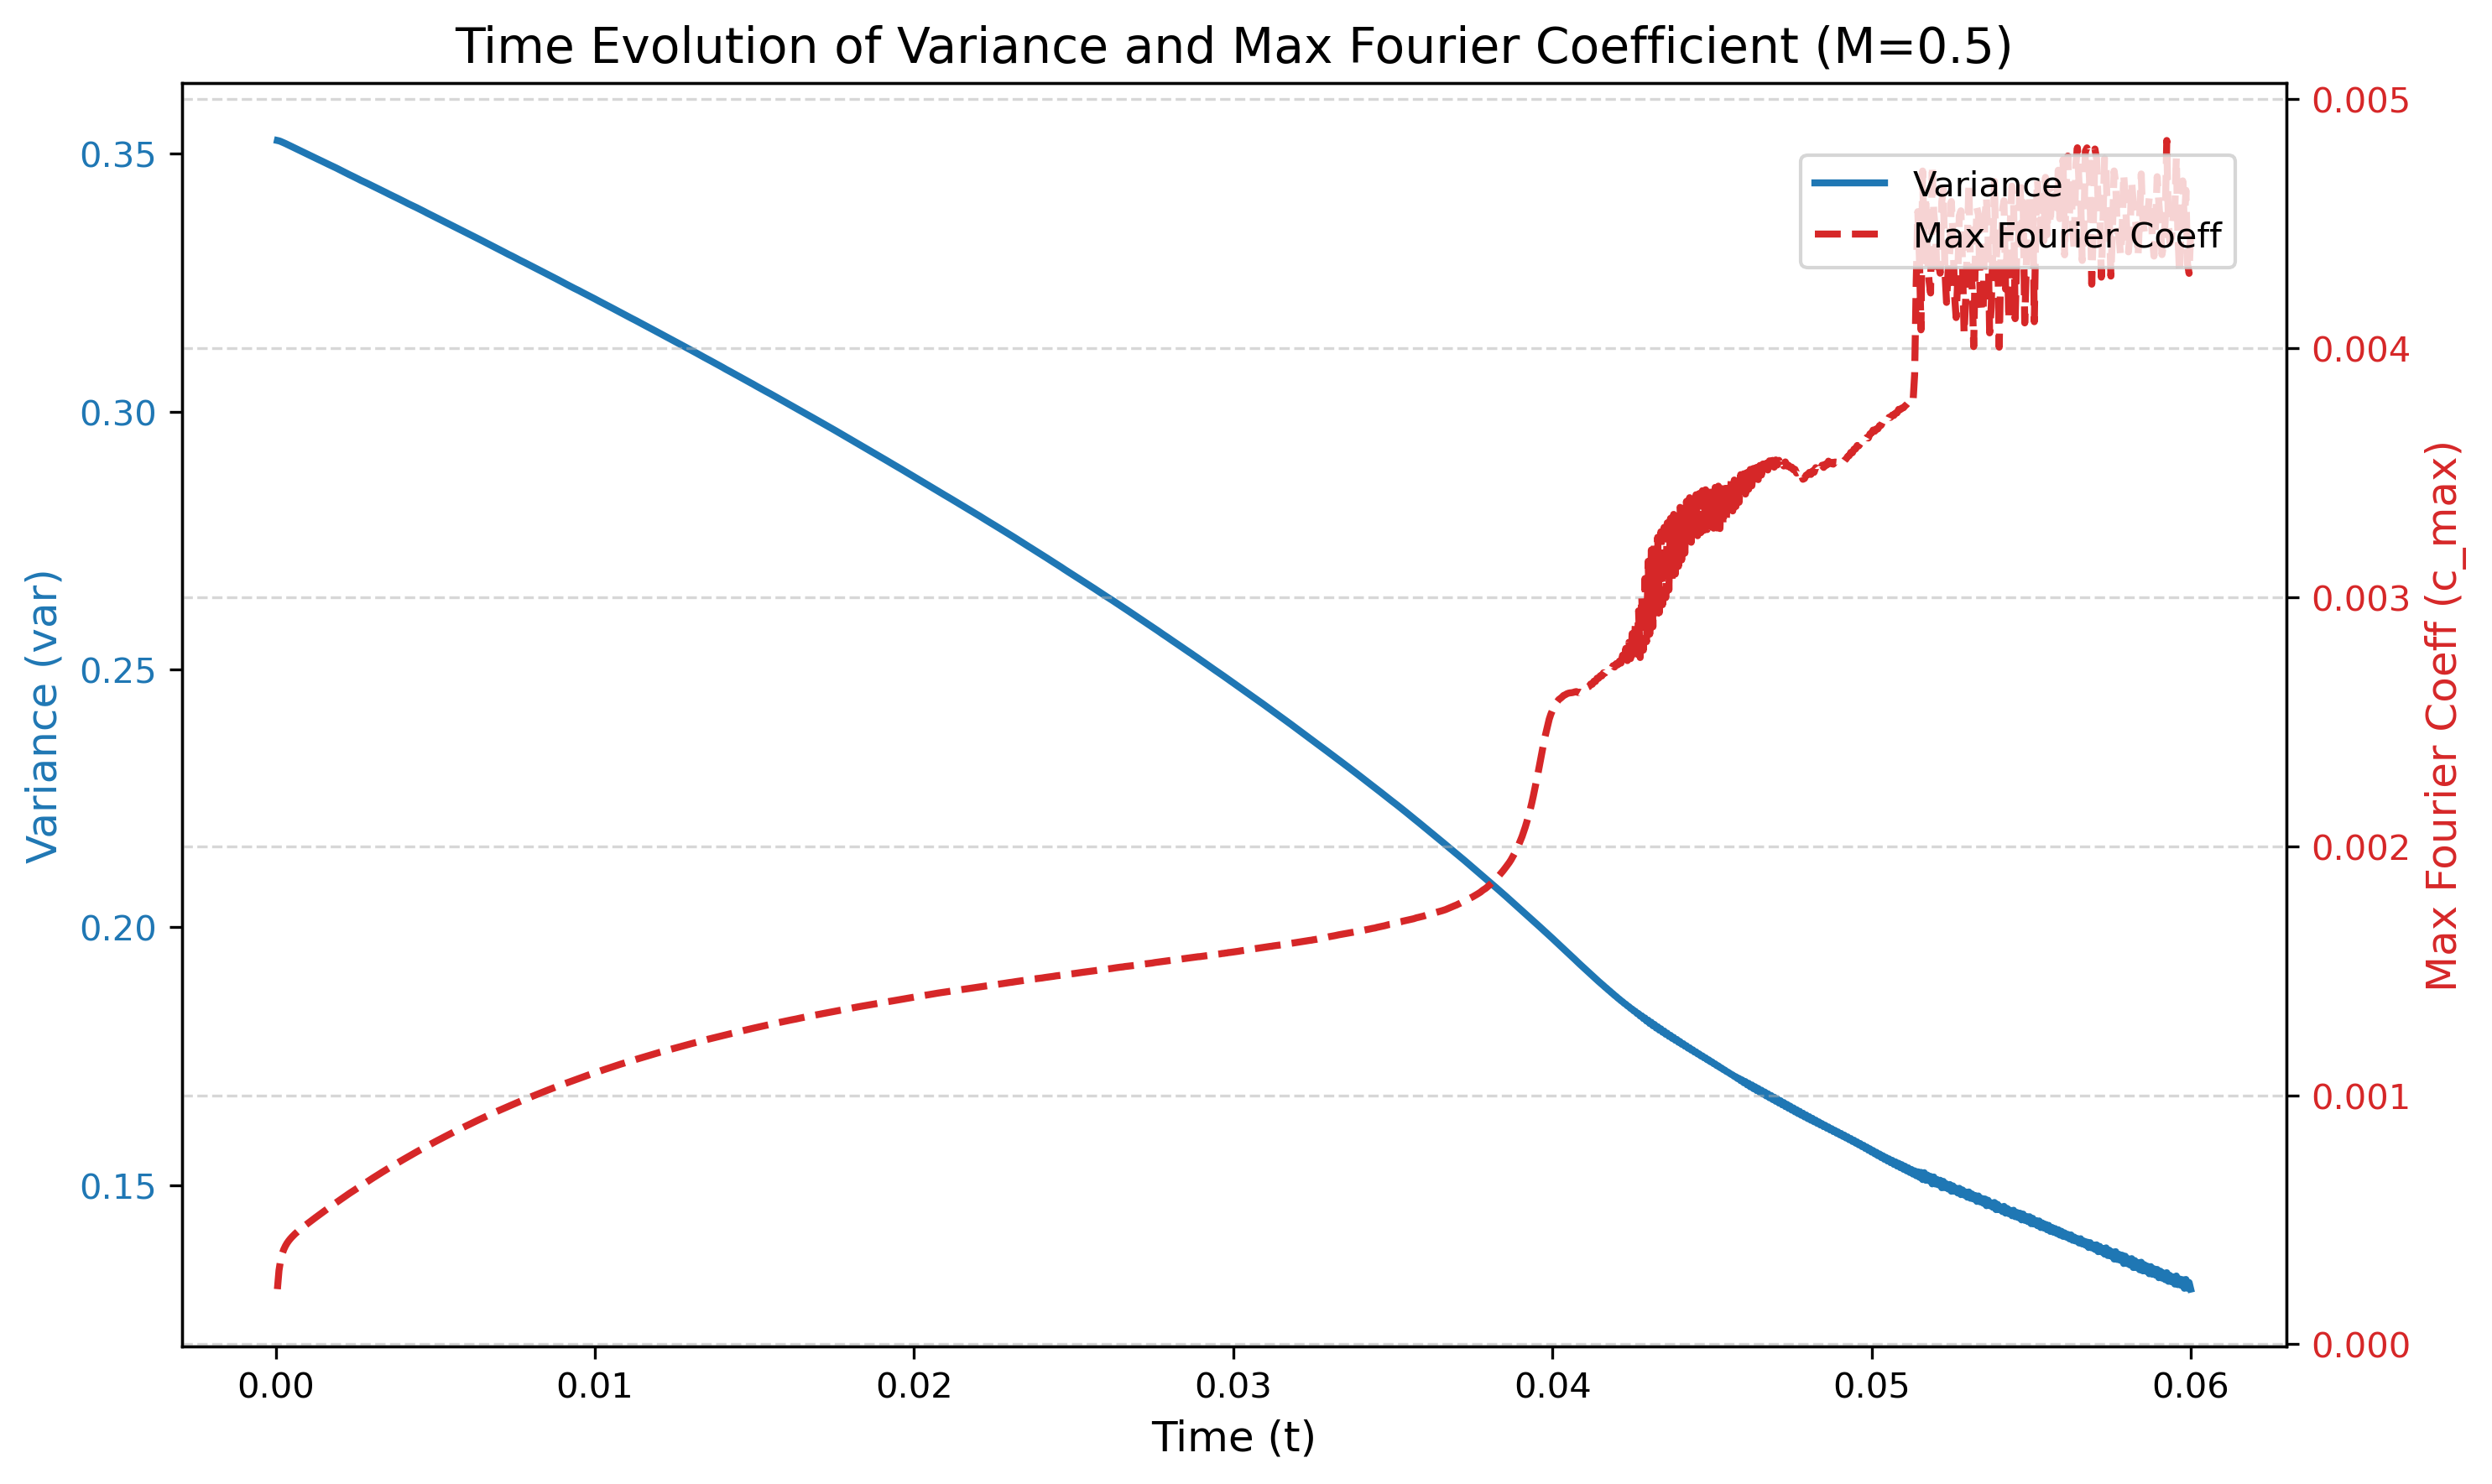

In [5]:
tlog = np.array(model.tlog)
varlog = np.array(model.varlog)
cmaxlog = np.array(model.cmaxlog)

# 创建画布和双轴
fig, ax1 = plt.subplots(figsize=(10, 6))


color_var = 'tab:blue'
ax1.set_xlabel('Time (t)', fontsize=12)
ax1.set_ylabel('Variance (var)', color=color_var, fontsize=12)
ax1.plot(tlog, varlog, color=color_var, linestyle='-', linewidth=2, label='Variance')
ax1.tick_params(axis='y', labelcolor=color_var)

# 创建右轴（c_max）
ax2 = ax1.twinx()
color_cmax = 'tab:red'
ax2.set_ylabel('Max Fourier Coeff (c_max)', color=color_cmax, fontsize=12)
ax2.plot(tlog, cmaxlog, color=color_cmax, linestyle='--', linewidth=2, label='Max Fourier Coeff')
ax2.tick_params(axis='y', labelcolor=color_cmax)

# 添加标题和图例
plt.title('Time Evolution of Variance and Max Fourier Coefficient (M=0.5)', fontsize=14)
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))  # 调整图例位置

# 优化布局
plt.grid(True, linestyle='--', alpha=0.5)
fig.tight_layout()